# 파이썬으로 하는 통계기초
성균관대학교 성균융합원 데이터사이언스융합학과  
미디어컨텐츠분석기법  
3조  
2019년 10월 4일  

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm

# 데이터 불러오기 및 프레임 변환

In [2]:
# 데이터 불러오기
df = pd.read_csv('./data/spstat1.csv', sep=',', encoding='euc-kr', engine='python')

In [3]:
# df 넌 어떻게 생겼니?
df

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [4]:
# 데이터 불러오고 다섯 행 출력하기
df = pd.read_csv('./data/spstat1.csv', sep=',', encoding='euc-kr', engine='python')
# head()는 상위 다섯 행만 출력이 된다
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [5]:
# 맨 뒤에 두 행만 출력해보자
df.tail(2)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [6]:
# 1행부터 4행까지 나와라 뿅
df[1:5]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [7]:
# 세번째 행 전까지 출력해보자 (2행까지 출력이 됩니다.)
df[:3]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1


In [8]:
# 247번째 행부터 전부 출력해보자
df[247:]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
247,137,2,2,5,200,6,2,3,2,3,...,1,1,0,2,1,7,8,2,1,2
248,226,2,3,5,200,6,2,1,3,2,...,2,2,0,2,1,6,4,6,2,2
249,98,2,5,1,200,2,3,2,4,3,...,2,1,0,3,2,6,4,3,2,2
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [9]:
# 구매장소 컬럼(열)의 데이터만 살펴 보자
df['구매장소']

0      1
1      3
2      1
3      3
4      5
5      4
6      2
7      4
8      4
9      3
10     4
11     5
12     4
13     3
14     4
15     4
16     1
17     4
18     4
19     1
20     2
21     5
22     3
23     1
24     1
25     2
26     4
27     3
28     3
29     4
      ..
222    4
223    3
224    4
225    5
226    2
227    1
228    4
229    5
230    3
231    4
232    1
233    4
234    4
235    4
236    5
237    3
238    1
239    2
240    5
241    4
242    5
243    2
244    4
245    2
246    4
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [10]:
# 필요하다고 생각되는 특정 컬럼만 출력해보기 (1, 4, 5번째 컬럼을 보자)
df[df.columns[[1,4,5]]]

,사용브랜드,구매가격,정보획득
0,1,15,1
1,1,20,4
2,1,25,1
3,1,26,4
4,1,30,6
5,1,30,6
6,1,40,1
7,1,40,6
8,1,40,6
9,1,40,2


In [11]:
# 컬럼 중에서 '학력'부터 '결혼'까지 출력해보자
df.loc[:,'학력':'결혼']

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
5,2,1,2,1
6,8,3,5,2
7,3,1,1,1
8,3,8,1,1
9,4,4,3,1


In [12]:
# 1번 ~ 6번 행
# 2번 ~ 4번 컬럼까지 출력하기
df.iloc[1:7,2:5]

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [13]:
# 구매가격 컬럼의 5번 행 표시
df.at[5,'구매가격']

30

In [14]:
# 구매가격이 50미만에 해당하는 데이터만 출력
df[df['구매가격'] < 50]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [15]:
# 구매가격이 150 초과
#         200 미만인 데이터만 나와라 뿅
df[(df['구매가격'] > 150) & (df['구매가격'] < 200)]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
234,140,2,3,4,170,6,3,5,1,2,...,1,2,1,3,2,4,2,5,1,4
235,128,2,5,4,180,6,4,3,4,5,...,5,3,1,6,3,1,9,3,3,2
236,25,2,3,5,180,6,5,3,3,3,...,4,4,1,4,2,6,4,5,1,4
237,149,2,2,3,182,6,2,5,2,3,...,3,4,1,3,2,4,4,6,2,2
238,244,2,4,1,190,5,5,2,3,5,...,4,2,0,5,3,4,4,2,2,4
239,90,2,3,2,190,6,2,2,2,4,...,4,5,0,4,2,4,4,5,1,4


In [16]:
# 데이터 프레임 행 복사
df_columns=df.copy()

In [17]:
# 데이터 프레임 행 확인
df_columns.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

# 기술통계

In [18]:
df['구매가격'].describe()

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

In [19]:
# 구매가격의 첨도를 보자
# 정규분포대비 봉오리의 높이를 알아보는 척도
# 첨도 > 0 정규분포보다 높다 (뾰족한 형태)
# 첨도 = 0 정규분포 높이랑 같다
# 첨도 < 0 정규분포보다 낮다 (납작한 형태)
df['구매가격'].kurtosis()

1.3613500036652209

In [20]:
# 구매가격의 왜도를 보자
# 자료의 대칭성을 알아보는 왜도
# 왜도 > 0 오른쪽으로 꼬리가 길다
# 왜도 = 0 대칭이다
# 왜도 < 0 왼쪽으로 꼬리가 길다
df['구매가격'].skew()

0.8074518614845148

In [21]:
# 사용브랜드에서 각 값이 몇 번 나오는지 확인해볼까?
# 127개와 125개 이므로 균등한 형태이다.
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [22]:
# Matplotlib 패키지를 불러오고, 맑은 고딕 폰트를 사용해보자
from matplotlib import font_manager, rc, rcParams
rc('font', family='Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

In [23]:
# 사용브랜드의 값 빈도수를 확인해보자
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_

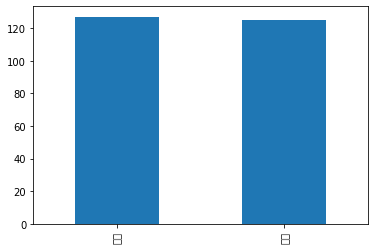

In [24]:
%matplotlib inline
df['사용브랜드'].replace([1,2], ['삼성', '애플']).value_counts().plot(kind="bar")

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


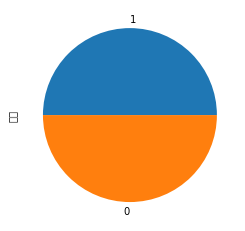

In [25]:
df['성별'].value_counts()
%matplotlib inline
df['성별'].value_counts().plot(kind="pie")

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

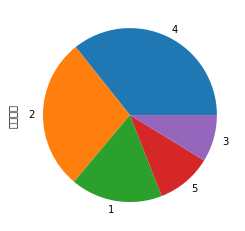

In [26]:
%matplotlib inline
df['구매장소'].value_counts().plot(kind="pie")

# 교차분석 (카이제곱검정)
- 교차분석은 **두 범주형 자료** 간에 **상호 관련성**을 알아보고자 할 때 사용하는 방법  
- 상관 관계의 정도가 강한지 약한지 분석 가능
- 교차표는 두 변수의 값이 공유하고 있는 빈도수가 몇 개인지 파악
- 교차분석은 쉬운 통계이기 때문에 전세계적으로 가장 많이 사용  
 - 예) 커피(x)를 많이 마시면 잠이 안오는가(y)?
 - 커피 섭취와 수면과 상관관계가 있는가? ~~(상관관계가 없으면 나이 먹은 겁니다)~~
- 참고 자료: [교차 분석 - 한남대학교 통계학과 권세혁교수](http://wolfpack.hnu.ac.kr/Book/SURVEY/cross_survey_wolfpack.pdf)

In [27]:
# crosstab 사용하여 '월수입'과 '사용브랜드' 컬럼만 사용해보자
pd.crosstab(df['월수입'], df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [28]:
# 교차분석을 해보자
# 결과값을 보자
# 카이제곱값이 1669.5%로 95% 유의수준에서 통계적으로 유의미한 차이가 있다고 보임
chisquare(df['월수입'], df['사용브랜드'])

Power_divergenceResult(statistic=1669.5, pvalue=1.1235911043911511e-207)

In [29]:
# 이번엔 '구매장소'와 '성별' 컬럼의 상관 관계를 알아보자
# 그러기 위해서 crosstab으로 두 컬럼만 살펴보자
pd.crosstab(df['구매장소'], df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [30]:
# 교차분석 시작
chisquare(df['구매장소'], ddof=[0,1])

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

# T-검정(독립표본 T-검정)
- 독립된 두 집단의 평균 차이를 검정하는 기법
- 서로 무관한 독립된 두 집단을 사용
- 두 개의 독립적인 정규분포에서 나온 𝑁1, 𝑁2개의 데이터 셋을 사용하여 두 정규분포의 기댓값이 동일한지를 검사한다.
- 등분산 여부에 따라 결과값이 달라지므로, 독립표본 T-검정을 시행 하기 전에 등분산 검정을 시행한 후 그 결과에 따라 독립표본 T-검정 시행
 - 등분산 검정이란, 두 모집단에서 추출한 표본의 분산이 같은 것
- 예시)
 - 여자/남자의 평균키 차이 비교 시
 - 10대와 20대의 평균 수면시간 차이
 - 한국인과 미국인의 평균 쌀 섭취량 비교

독립표본 t검정은 사이파이 stats 서브패키지의 ttest_ind 명령을 사용하여 계산한다. 독립표본 t검정은 두 정규분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 한다. 두 분포의 분산이 같은지 다른지는 다음에 나올 등분산검정(equal-variance test)을 사용하면 된다. 만약 잘 모르겠으면 equal_var=False로 놓으면 된다.

scipy.stats.ttest_inds(a, b, equal_var=True)

a: 1번 표본 집합 데이터
b: 2번 표본 집합 데이터
equal_var: 두 표본 집합의 분산이 같은경우에는 True
예제¶

두 정규분포의 기댓값이  𝜇1=0
μ
1
=
0
 ,  𝜇2=0.5
μ
2
=
0.5
 로 다르고 분산은  𝜎1=𝜎2=1
σ
1
=
σ
2
=
1
  으로 같으며 표본의 수가  𝑁1=𝑁2=10
N
1
=
N
2
=
10
 인 경우를 시뮬레이션해보자. 우리는 분산 값이 정말 같은지 모르므로 일단 equal_var=False로 놓는다.

In [31]:
mean = df['구매가격'].values
mean1 = df[df['사용브랜드']==1].구매가격.values
mean2 = df[df['사용브랜드']==2].구매가격.values

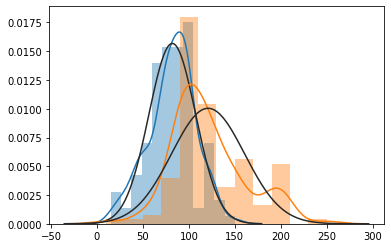

(0.9720979928970337, 0.009973179548978806)

In [32]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1) #H0: Normal Distribution을 따름, Return(W, P-value)

In [33]:
# H0: Normal Distribution을 따름, Return(W, P-value)
sp.stats.levene(mean1, mean2)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [34]:
# Independent 2-sample t-test
stats.ttest_ind(mean1, mean2, equal_var=False)

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

In [35]:
mean = df['재구매의향'].values
mean1 = df[df['사용브랜드']==1].재구매의향.values
mean2 = df[df['사용브랜드']==2].재구매의향.values

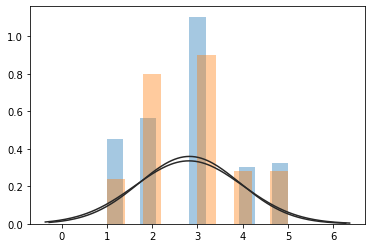

(0.8974907994270325, 7.541181901160598e-08)

In [36]:
%matplotlib inline

sns.distplot(mean1, kde=False, fit=sp.stats.norm)
sns.distplot(mean2, kde=False, fit=sp.stats.norm)
plt.show()

# H0: Normal Distribution을 따름, Return(W, P-value)
sp.stats.shapiro(mean1)

In [37]:
# H0: Normal Distribution을 따름, Return(W, P-value)
sp.stats.levene(mean1, mean2)

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [38]:
# Independent 2-sample t-test
stats.ttest_ind(mean1, mean2, equal_var=True)

Ttest_indResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513)

# 분산분석(ANOVA)
종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.
- 여러 집단 간의 평균의 차이가 통계적으로 유의미 여부를 볼 떄
- T-검정과 비슷하나 집단수가 3개 이상 일 때 사용

분산분석에는 다음과 같은 3가지의 조건이 필요해요.  

- 정규성 : 각각의 그룹에서 변인은 정규분포
- 분산의 동질성 : Y의 모집단 분산은 각각의 모집단에서 동일
- 관찰의 독립성: 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집

In [39]:
anova1=df[df['연령2']==1].재구매의향.values
anova2=df[df['연령2']==2].재구매의향.values
anova3=df[df['연령2']==3].재구매의향.values

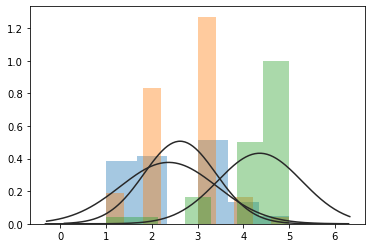

In [40]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

In [41]:
stats.f_oneway(anova1, anova2, anova3)  

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['재구매의향'],     # Data
                          groups=df['연령2'],   # Groups
                          alpha=0.05)          # Significance level

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1275,-0.0526,0.5526,False
1,3,1.9905,0.001,1.5849,2.396,True
2,3,1.7405,0.001,1.3514,2.1295,True


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


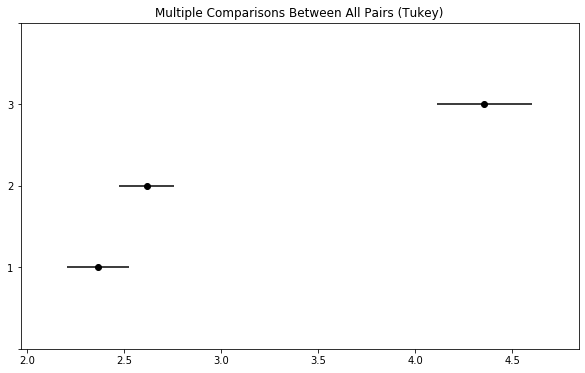

In [43]:
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
plt.show()

In [44]:
anova1=df[df['연령2']==1].구매가격.values
anova2=df[df['연령2']==2].구매가격.values
anova3=df[df['연령2']==3].구매가격.values
stats.f_oneway(anova1, anova2, anova3)  

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

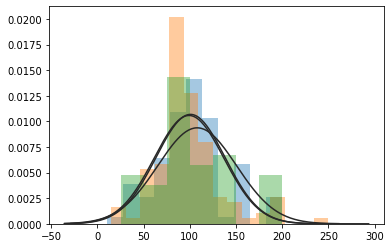

In [45]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

# 상관분석
- 확률론과 통계학에서 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- 두 변수는 서로 독립적인 관계로부터 서로 상관된 관계일 수 있으며, 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)
- 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수 ρ를 사용합니다.
- 상관관계의 정도를 파악하는 상관계수(Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 의미하는 것은 아님
- 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인

In [46]:
sp.stats.pearsonr(df['재구매의향'], df['구입조언']) #return(Pearson’s correlation coefficient, 2-tailed p-value)

(0.4178362064881855, 4.546075388272514e-12)

In [47]:
corr = sp.stats.pearsonr(df['재구매의향'], df['구입조언'])
print('correlation coefficient=%.3f, p-value=%.3f' %(corr))

correlation coefficient=0.418, p-value=0.000


In [48]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


# 회귀분석
- 수치형 종속 변수와 수치형 독립 변수사이의 영향 또는 인과관계 분석
- 상관분석은 두 변수간의 상관관계를 수치화할 뿐 각 독립변수가 종속변수에 미치는 영향 또는 관계 측정 불가능
- [참조문서](https://kiyoja07.blogspot.com/2019/03/python-linear-regression.html)

In [49]:
ols(formula='재구매의향 ~ 성별+연령+학력+월수입+사용기간+구매가격+구입조언+브랜드이미지+가격만족도+구매중요도1_메모리+하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           7.46e-57
Time:                        16:12:48   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0,

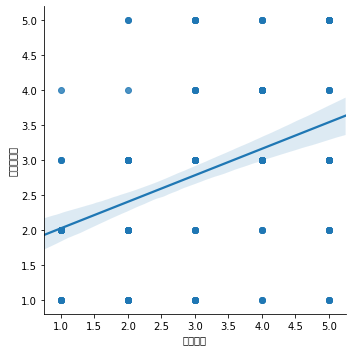

In [50]:
sns.lmplot(y='재구매의향', x='사용기간', data=df)